In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import date
from datetime import datetime

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

sns.set_style(style=("darkgrid"))
plt.figure(figsize=(10, 8))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [3]:
df = pd.read_csv("train.csv")
df.head()


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [5]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [6]:
df_train = df.copy()

<Axes: >

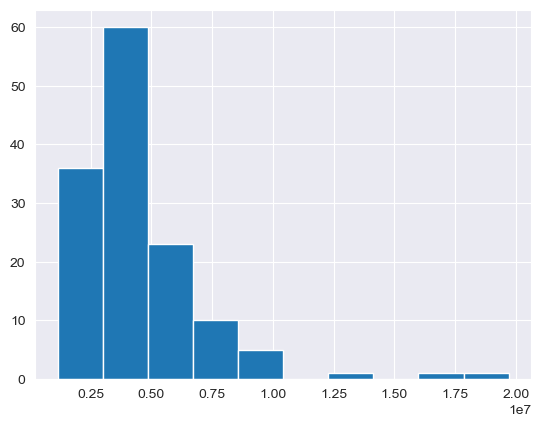

In [7]:
df_train["revenue"].hist()

In [8]:
df_train["cat_revenue"] = pd.cut(df_train["revenue"],
                               bins=[0, 5000000, 10000000, np.inf],
                               labels=["low", "mid", "high"])
df_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,cat_revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,mid
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,mid
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,low
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,low
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,low


In [9]:
def transform_date(dataframe):
    today = date.today()
    days = []
    for value in dataframe["Open Date"].values:
        casting_date = datetime.strptime(value, "%m/%d/%Y").date()
        delta = today - casting_date
        day = delta.days
        days.append(day)

    dataframe["Open Date"] = pd.Series(days, name="Open Days")
    return dataframe

In [10]:
df_train = transform_date(df_train)
df_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,cat_revenue
0,0,8920,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,mid
1,1,5786,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,mid
2,2,3936,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,low
3,3,4337,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,low
4,4,5336,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,low


<Axes: >

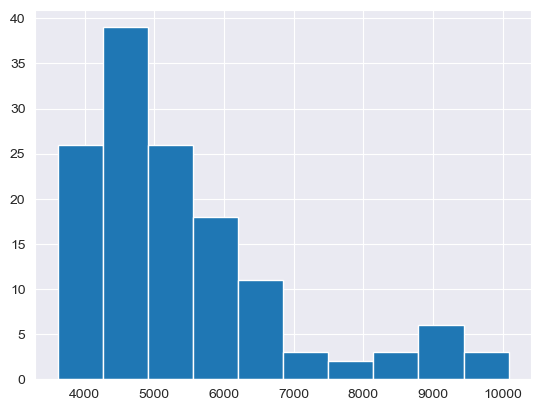

In [11]:
df_train["Open Date"].hist()

In [12]:
df_train["cat_age"] = pd.cut(df_train["Open Date"],
                           bins=[0, 4000, 7000, np.inf],
                           labels=['new', "mid", "old"])
df_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,revenue,cat_revenue,cat_age
0,0,8920,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3,4,5,5,4,3,4,5653753.0,mid,old
1,1,5786,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,6923131.0,mid,mid
2,2,3936,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,2055379.0,low,new
3,3,4337,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,12,10,6,18,12,12,6,2675511.0,low,mid
4,4,5336,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,1,3,2,3,4,3,3,4316715.0,low,mid


In [13]:
df_vis = df_train.select_dtypes(exclude=("int64", "float64"))
df_vis.head()

,City,City Group,Type,cat_revenue,cat_age
0,İstanbul,Big Cities,IL,mid,old
1,Ankara,Big Cities,FC,mid,mid
2,Diyarbakır,Other,IL,low,new
3,Tokat,Other,IL,low,mid
4,Gaziantep,Other,IL,low,mid


<Axes: xlabel='City Group', ylabel='count'>

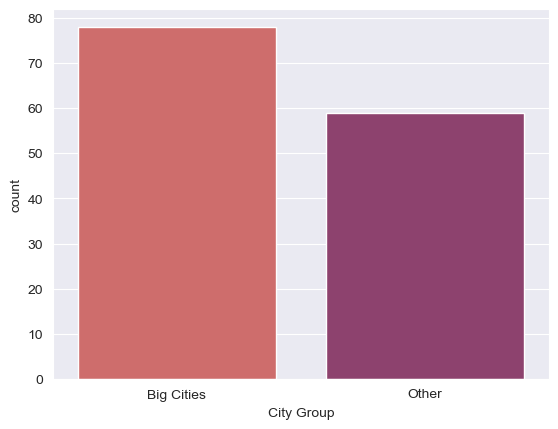

In [14]:
sns.countplot(data=df_vis, x="City Group", palette="flare")

<Axes: xlabel='City', ylabel='count'>

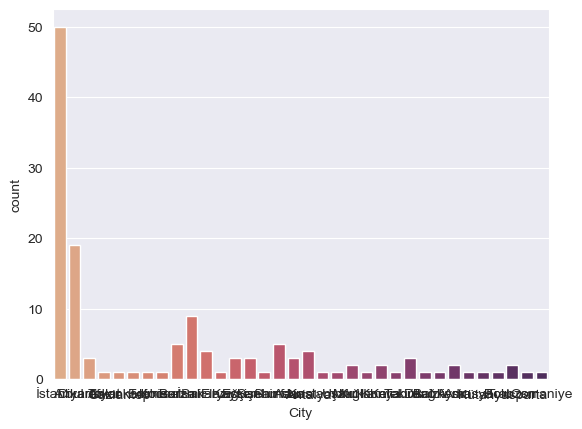

In [15]:
sns.countplot(data=df_vis, x="City", palette="flare")

<Axes: xlabel='Type', ylabel='count'>

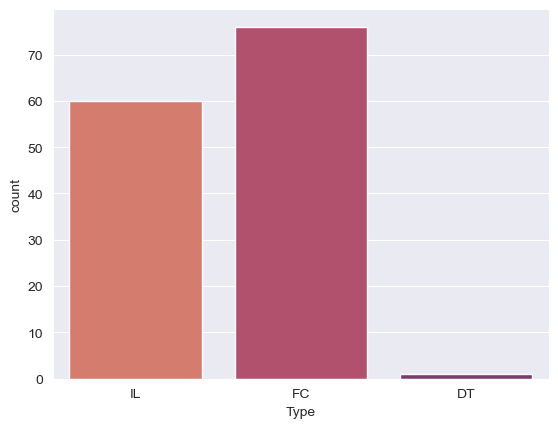

In [16]:
sns.countplot(data=df_vis, x="Type", palette="flare")

<Axes: xlabel='cat_revenue', ylabel='count'>

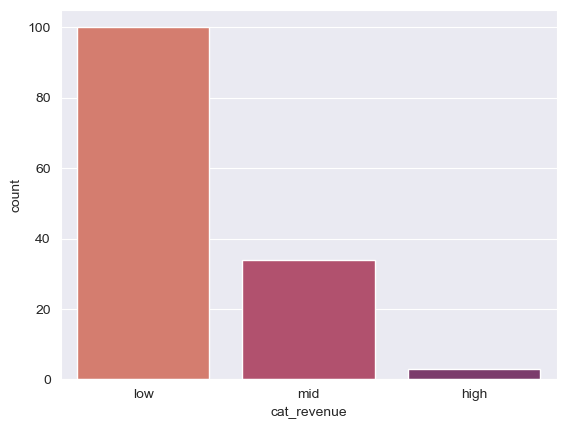

In [17]:
sns.countplot(data=df_vis, x="cat_revenue", palette="flare")

<Axes: xlabel='cat_age', ylabel='count'>

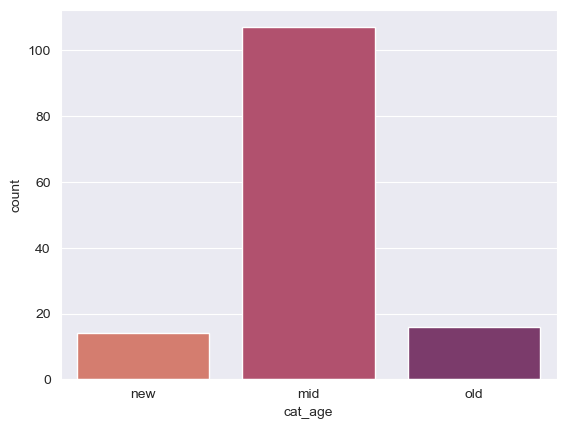

In [18]:
sns.countplot(data=df_vis, x="cat_age", palette="flare")

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


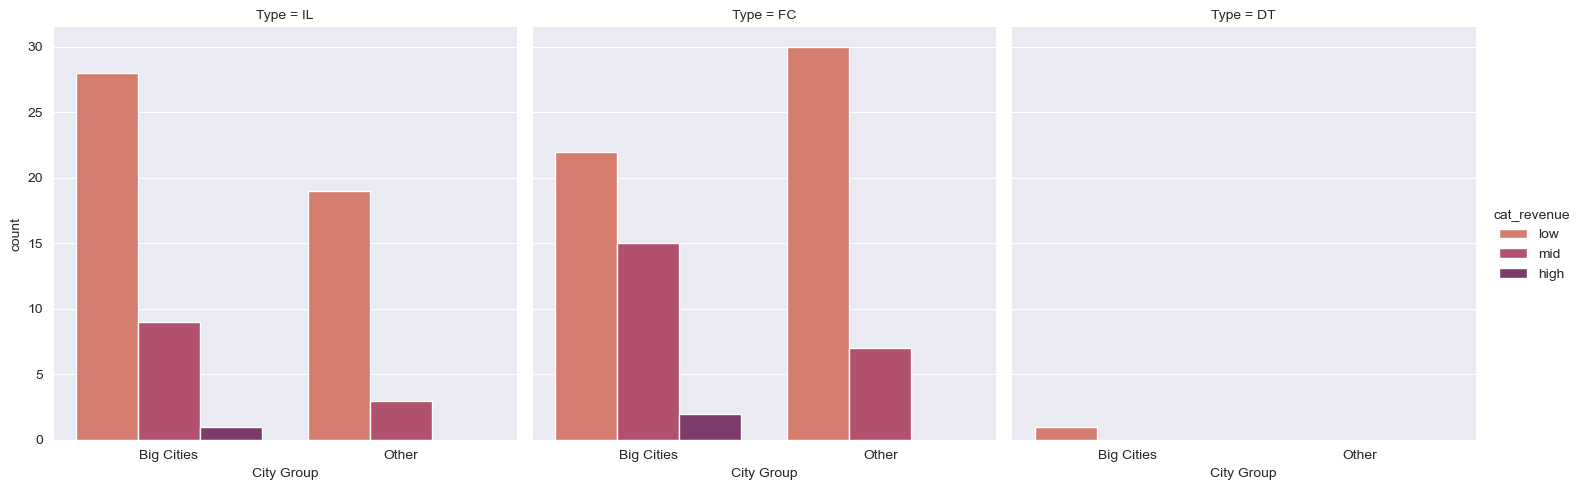

In [20]:
sns.catplot(data=df_vis, x="City Group", hue="cat_revenue", col="Type", kind="count", palette="flare")

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


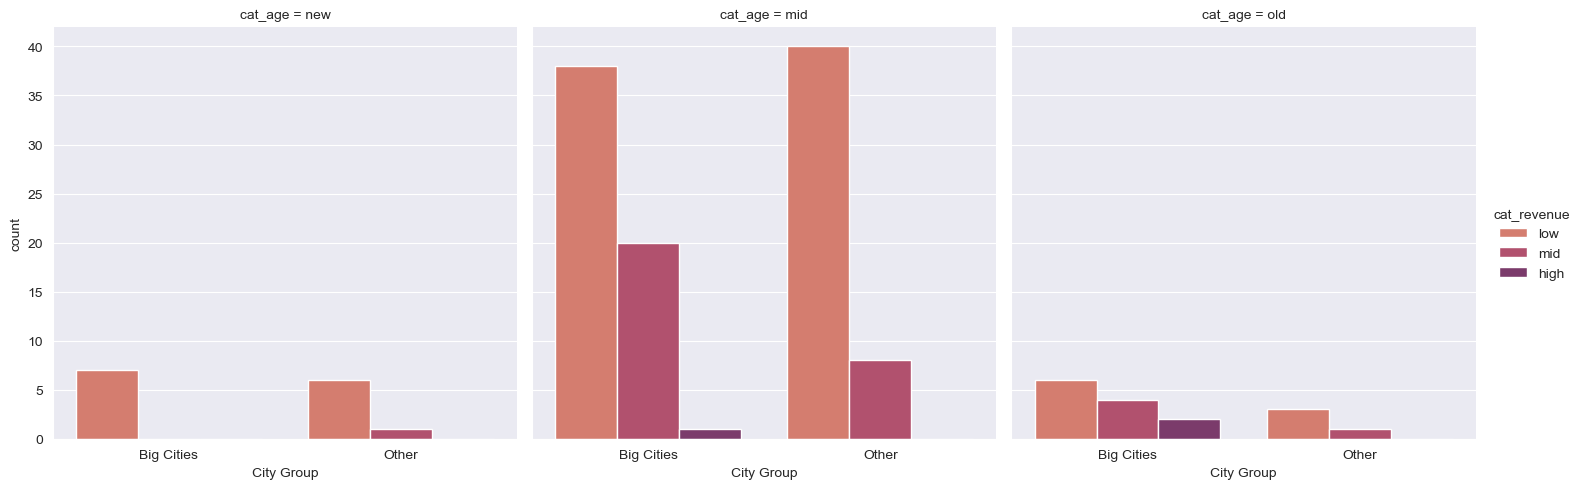

In [21]:
sns.catplot(data=df_vis, x="City Group", hue="cat_revenue", col="cat_age", kind="count", palette="flare")

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


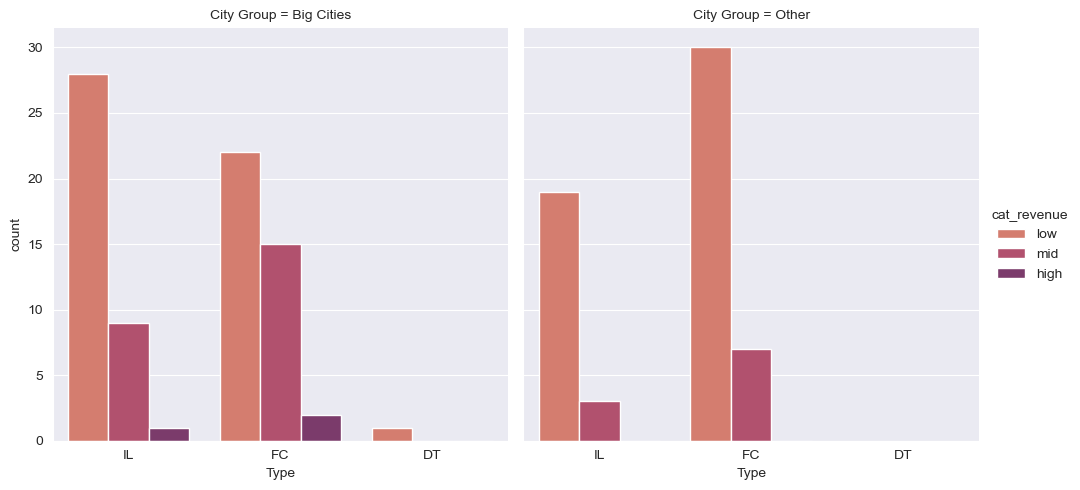

In [22]:
sns.catplot(data=df_vis, x="Type", hue="cat_revenue", col="City Group", kind="count", palette="flare")

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


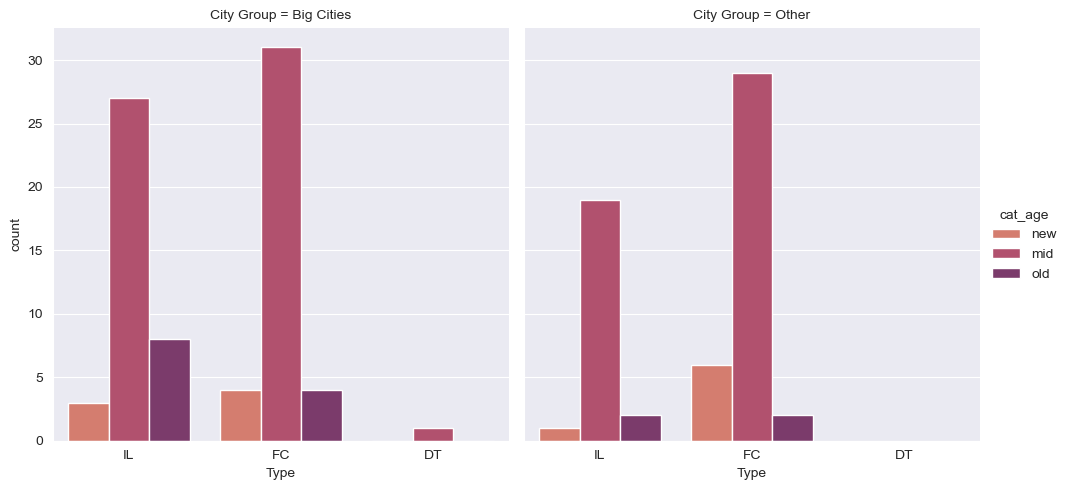

In [23]:
sns.catplot(data=df_vis, x="Type", hue="cat_age", col="City Group", kind="count", palette="flare")

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


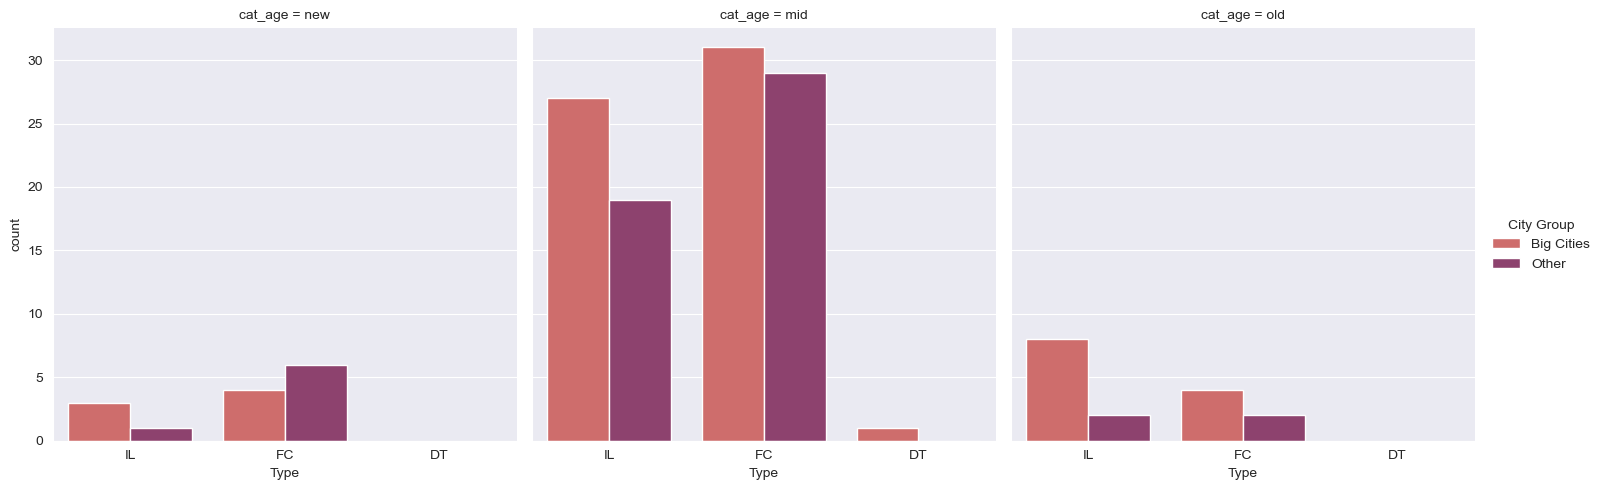

In [24]:
sns.catplot(data=df_vis, x="Type", hue="City Group", col="cat_age", kind="count", palette="flare")

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


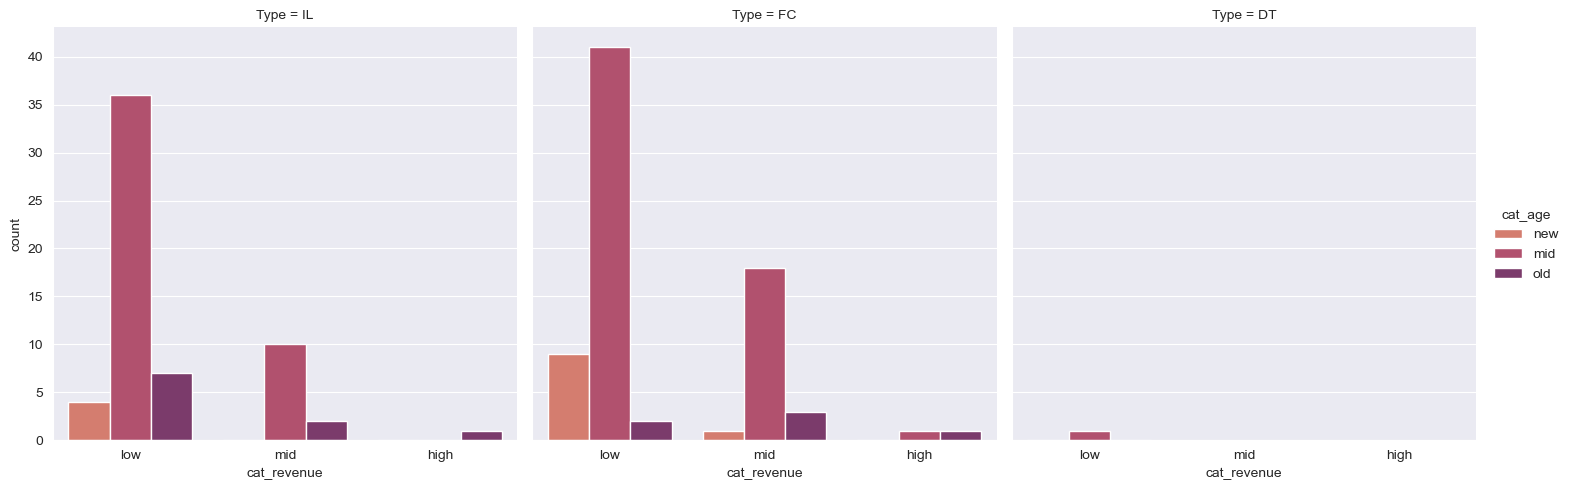

In [25]:
sns.catplot(data=df_vis, x="cat_revenue", hue="cat_age", col="Type", palette="flare", kind="count")

In [26]:
df_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,revenue,cat_revenue,cat_age
0,0,8920,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3,4,5,5,4,3,4,5653753.0,mid,old
1,1,5786,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,6923131.0,mid,mid
2,2,3936,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,2055379.0,low,new
3,3,4337,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,12,10,6,18,12,12,6,2675511.0,low,mid
4,4,5336,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,1,3,2,3,4,3,3,4316715.0,low,mid


In [27]:
X_train = df_train.drop(["Id", "City", "revenue", "cat_revenue", "cat_age"], axis=1)
y_train = df_train["revenue"]

In [28]:
X_train.head()

,Open Date,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,8920,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,2.0,3.0,5,3,4,5,5,4,3,4
1,5786,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,3.0,3.0,0,0,0,0,0,0,0,0
2,3936,Other,IL,2,4.0,2.0,5.0,2,3,5,...,1.0,3.0,0,0,0,0,0,0,0,0
3,4337,Other,IL,6,4.5,6.0,6.0,4,4,10,...,2.5,7.5,25,12,10,6,18,12,12,6
4,5336,Other,IL,3,4.0,3.0,4.0,2,2,5,...,1.0,3.0,5,1,3,2,3,4,3,3


In [29]:
y_train.head()

0    5653753.0
1    6923131.0
2    2055379.0
3    2675511.0
4    4316715.0
Name: revenue, dtype: float64

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 40 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open Date   137 non-null    int64  
 1   City Group  137 non-null    object 
 2   Type        137 non-null    object 
 3   P1          137 non-null    int64  
 4   P2          137 non-null    float64
 5   P3          137 non-null    float64
 6   P4          137 non-null    float64
 7   P5          137 non-null    int64  
 8   P6          137 non-null    int64  
 9   P7          137 non-null    int64  
 10  P8          137 non-null    int64  
 11  P9          137 non-null    int64  
 12  P10         137 non-null    int64  
 13  P11         137 non-null    int64  
 14  P12         137 non-null    int64  
 15  P13         137 non-null    float64
 16  P14         137 non-null    int64  
 17  P15         137 non-null    int64  
 18  P16         137 non-null    int64  
 19  P17         137 non-null    i

In [31]:
X_train_num = X_train.select_dtypes(include=("int64", "float64"))
X_train_num.head()

,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,8920,4,5.0,4.0,4.0,2,2,5,4,5,...,2.0,3.0,5,3,4,5,5,4,3,4
1,5786,4,5.0,4.0,4.0,1,2,5,5,5,...,3.0,3.0,0,0,0,0,0,0,0,0
2,3936,2,4.0,2.0,5.0,2,3,5,5,5,...,1.0,3.0,0,0,0,0,0,0,0,0
3,4337,6,4.5,6.0,6.0,4,4,10,8,10,...,2.5,7.5,25,12,10,6,18,12,12,6
4,5336,3,4.0,3.0,4.0,2,2,5,5,5,...,1.0,3.0,5,1,3,2,3,4,3,3


In [32]:
X_train_cat = X_train.select_dtypes(include=("object"))
X_train_cat.head()

,City Group,Type
0,Big Cities,IL
1,Big Cities,FC
2,Other,IL
3,Other,IL
4,Other,IL


In [33]:
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")),
                         ("scaler", StandardScaler())])


In [34]:
num_features_name = list(X_train_num.columns)
cat_ordinal_name = ["City Group"]
cat_onehot_name = ["Type"]

full_pipeline = ColumnTransformer([("num features", num_pipeline, num_features_name),
                                   ("ordinal encoding", OrdinalEncoder(), cat_ordinal_name),
                                   ("one hot encoding", OneHotEncoder(), cat_onehot_name)])

X_train_preprocessed = full_pipeline.fit_transform(X_train)


In [35]:
dataframe = pd.DataFrame(X_train_preprocessed)
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,2.412027,-0.005034,0.391716,-0.308701,-0.367578,-0.006056,-0.638471,-0.185001,-0.622801,-0.243564,...,0.282950,2.281657,0.487922,0.575634,0.189821,1.615951,0.0,0.0,0.0,1.0
1,0.274059,-0.005034,0.391716,-0.308701,-0.367578,-0.835796,-0.638471,-0.185001,-0.082777,-0.243564,...,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,0.0,0.0,1.0,0.0
2,-0.987983,-0.694749,-0.270816,-2.253162,0.619837,-0.006056,-0.168199,-0.185001,-0.082777,-0.243564,...,-0.484658,-0.672851,-0.483667,-0.592690,-0.532553,-0.625925,1.0,0.0,0.0,1.0
3,-0.714427,0.684680,0.060450,1.635760,1.607252,1.653422,0.302072,1.999921,1.537293,2.491539,...,1.434362,2.872558,3.014054,2.912282,2.356945,2.736889,1.0,0.0,0.0,1.0
4,-0.032924,-0.349892,-0.270816,-1.280931,-0.367578,-0.006056,-0.638471,-0.185001,-0.082777,-0.243564,...,0.091048,0.508952,0.099286,0.575634,0.189821,1.055482,1.0,0.0,0.0,1.0


In [36]:
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(dataframe)
pca.n_components_

27

In [37]:
def modeling(stimator, X_train, y_train, cv=3, scoring="neg_mean_squared_error"):
    
    model = stimator
    model.fit(X_train, y_train)
    pred = model.predict(X_train)
    mse = mean_squared_error(y_train, pred)
    rmse = np.sqrt(mean_squared_error(y_train, pred))
    score = r2_score(y_train, pred)
    
    print(stimator)
    print(f"mse on training data: {mse}")
    print(f"rmse on training data: {rmse}")
    print(f"r2_score: {score}")
    scores = cross_val_score(stimator, X_train, y_train, cv=cv, scoring=scoring)
    
    if scoring=="neg_mean_squared_error":
        mean_mse = np.mean(-sum(scores))
        mean_rmse = np.sqrt(mean_mse)
        print(f"mean mse on cross val data: {mean_mse}")
        print(f"mean rmse on cross val data: {mean_rmse}")
    
    elif scoring=="r2":
        mean_score = np.mean(scores)
        print(f"mean r2 score on cross val data: {mean_score}")

    print("__________________________________________________________________________________________________")


In [38]:
regressors = {"SVR": SVR(),
              "RandomForestRegressor": RandomForestRegressor(),
              "AdaBoostRegressor": AdaBoostRegressor(),
              "KNN": KNeighborsRegressor(),
              "SGD": SGDRegressor(), 
              "Ridge": Ridge(),
              "Lasso": Lasso()}

In [39]:
for regressor in regressors.values():
    modeling(regressor, X_train_pca, y_train)

SVR()
mse on training data: 6851618477610.637
rmse on training data: 2617559.6416530106
r2_score: -0.04006138569685036
mean mse on cross val data: 20635992951068.61
mean rmse on cross val data: 4542685.654001233
__________________________________________________________________________________________________
RandomForestRegressor()
mse on training data: 1072209200386.1754
rmse on training data: 1035475.3499655003
r2_score: 0.8372408810626817
mean mse on cross val data: 23100423886762.28
mean rmse on cross val data: 4806290.033566668
__________________________________________________________________________________________________
AdaBoostRegressor()
mse on training data: 1352993085927.1155
rmse on training data: 1163182.3098410307
r2_score: 0.7946184732284824
mean mse on cross val data: 23457762765364.938
mean rmse on cross val data: 4843321.460048356
__________________________________________________________________________________________________
KNeighborsRegressor()
mse on trainin

In [40]:
num_pipeline2 = Pipeline([("imputer", SimpleImputer(strategy="median")),
                         ("scaler", MinMaxScaler())])

num_features_name = list(X_train_num.columns)
cat_ordinal_name = ["City Group"]
cat_onehot_name = ["Type"]

full_pipeline_nn = ColumnTransformer([("num features", num_pipeline2, num_features_name),
                                   ("ordinal encoding", OrdinalEncoder(), cat_ordinal_name),
                                   ("one hot encoding", OneHotEncoder(), cat_onehot_name)])

X_train_preprocessed_nn = full_pipeline_nn.fit_transform(X_train)

In [41]:
dataframe2 = pd.DataFrame(X_train_preprocessed_nn)

pca_nn = PCA(n_components=0.95)
X_train_nn_pca = pca_nn.fit_transform(dataframe2)
pca_nn.n_components_

13